# PROYECTO 1


## JESSICA MARISOL CASTELLANOS MARTÍNEZ
### 24000218


In [2]:
#Proyecto 1 
#IMPORTANDO LIBRERIAS

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [3]:
#Cargando el dataset 
ds = pd.DataFrame(np.load(r'C:/Users/jessi/Proyecto/proyecto_training_data.npy'))

ds.head()

,0,1,2,3,4,5
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [4]:
#Asignando el nombre colocado en Data Fields

SALE_PRICE_COL = "SalePrice"
OVERALL_QUAL_COL = "OverallQual"
FIRST_FLOOR_SF_COL = "1stFlrSF"
TOTAL_ROOMS_ABOVE_GRADE_COL = "TotRmsAbvGrd"
YEAR_BUILT_COL = "YearBuilt"
LOT_FRONTAGE_COL = "LotFrontage"

In [5]:
#RENOMBRANDO 
ds = ds.rename(columns={
    0: SALE_PRICE_COL,
    1: OVERALL_QUAL_COL,
    2: FIRST_FLOOR_SF_COL,
    3: TOTAL_ROOMS_ABOVE_GRADE_COL,
    4: YEAR_BUILT_COL,
    5: LOT_FRONTAGE_COL
})

ds.head()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,208500.0,7.0,856.0,8.0,2003.0,65.0
1,181500.0,6.0,1262.0,6.0,1976.0,80.0
2,223500.0,7.0,920.0,6.0,2001.0,68.0
3,140000.0,7.0,961.0,7.0,1915.0,60.0
4,250000.0,8.0,1145.0,9.0,2000.0,84.0


In [6]:
#Dataset Dimension
ds.shape

(1460, 6)

In [7]:
ds.dtypes

SalePrice       float64
OverallQual     float64
1stFlrSF        float64
TotRmsAbvGrd    float64
YearBuilt       float64
LotFrontage     float64
dtype: object

In [8]:
#Se desea predecir el precio de venta entonces nuestra variable y dependiente y excluimos del dataset

y = ds.SalePrice

DATAMAX = ds.copy().drop(SALE_PRICE_COL, axis=1)

DATAMAX

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
0,7.0,856.0,8.0,2003.0,65.0
1,6.0,1262.0,6.0,1976.0,80.0
2,7.0,920.0,6.0,2001.0,68.0
3,7.0,961.0,7.0,1915.0,60.0
4,8.0,1145.0,9.0,2000.0,84.0
...,...,...,...,...,...
1455,6.0,953.0,7.0,1999.0,62.0
1456,6.0,2073.0,7.0,1978.0,85.0
1457,7.0,1188.0,9.0,1941.0,66.0
1458,5.0,1078.0,5.0,1950.0,68.0


In [9]:
# 80% y 20% para validaciones 
x_train, x_test,y_traint, y_test = train_test_split(DATAMAX, y, test_size=0.8)

In [15]:
# Correlación entre x y y 

y_test = ds[0]
print(y_test)

KeyError: 0

In [16]:
#Descripción valores del dataset 
DATAMAX.describe()

#count
#media
#std = desviación estándar
#minimo y máximo 
#cuartiles 

,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,1.382997,386.587738,1.625393,30.202904,24.284752
min,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,10.000000,4692.000000,14.000000,2010.000000,313.000000


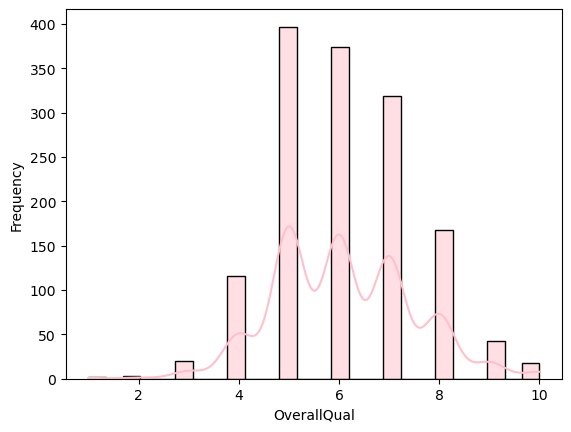

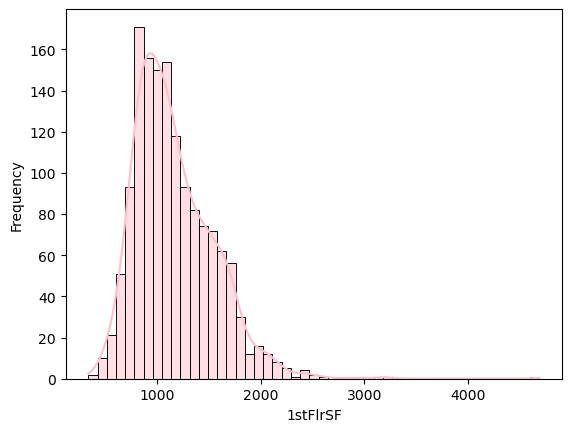

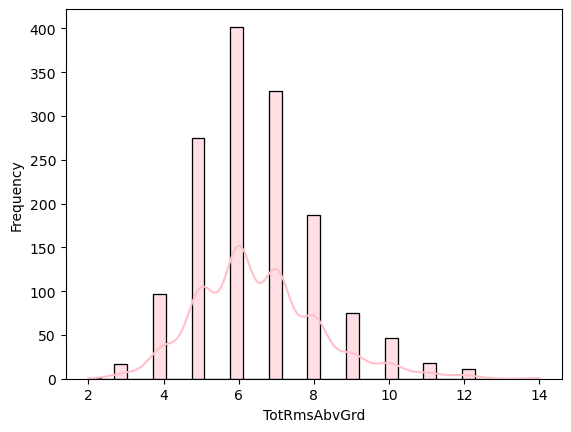

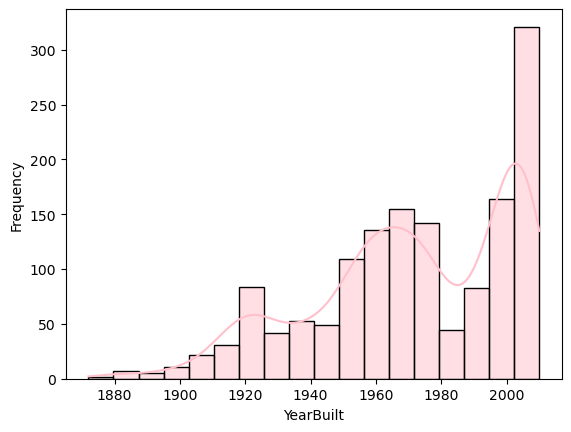

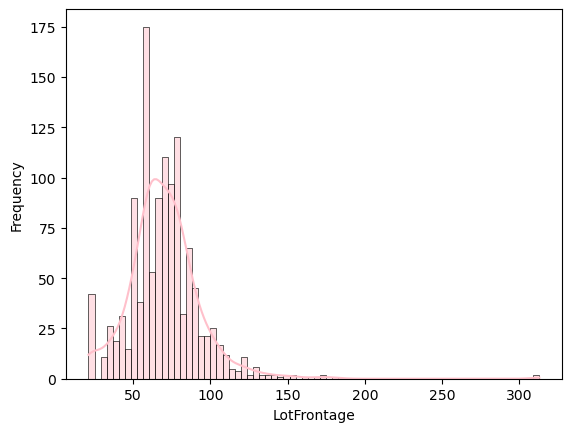

In [17]:
def plot_columns(ds: pd.DataFrame, color='pink'):
    columns = ds.columns
    for i, col in enumerate(columns):
        plt.figure(i)
        sns.histplot(ds[col], kde=True, color=color)
        plt.xlabel(col)  # Etiqueta del eje x con el nombre de la columna
        plt.ylabel('Frequency')  # Etiqueta del eje y

plot_columns(DATAMAX)
plt.show()


In [18]:
#CALCULANDO COEFICIENTE DE CORRELACIÓN ENTRE X, Y 
y = ds.iloc[:, 0]
print(y)

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64


In [20]:
# Calcular correlación
correlation_matrix = ds.corr()

# Imprimir la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)


Matriz de correlación:
              SalePrice  OverallQual  1stFlrSF  TotRmsAbvGrd  YearBuilt  \
SalePrice      1.000000     0.790982  0.605852      0.533723   0.522897   
OverallQual    0.790982     1.000000  0.476224      0.427452   0.572323   
1stFlrSF       0.605852     0.476224  1.000000      0.409516   0.281986   
TotRmsAbvGrd   0.533723     0.427452  0.409516      1.000000   0.095589   
YearBuilt      0.522897     0.572323  0.281986      0.095589   1.000000   
LotFrontage    0.351799     0.251646  0.457181      0.352096   0.123349   

              LotFrontage  
SalePrice        0.351799  
OverallQual      0.251646  
1stFlrSF         0.457181  
TotRmsAbvGrd     0.352096  
YearBuilt        0.123349  
LotFrontage      1.000000  


In [ ]:
#for col in SalePrice:
#    sns.distplot(ds[col])
#    plt.show()

In [29]:
#6.  CREAR UNA FUNCIÓN 
import numpy as np

def train_linear_regression(ds, epochs, imprimir_error_cada, alpha):
    x = ds['x']
    y = ds['y']
    
    # Inicializar los parámetros beta0 y beta1 aleatoriamente
    beta0 = np.random.rand()
    beta1 = np.random.rand()
    
    # Función para calcular el error cuadrático medio
    def calcular_error(y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)
    
    # Entrenamiento del modelo
    for epoch in range(epochs):
        # Calcular predicciones
        y_pred = beta0 + beta1 * x
        
        # Calcular el error
        error = calcular_error(y, y_pred)
        
        # Actualizar parámetros usando gradiente descendente
        gradient_beta0 = np.mean(-(2 * (y - y_pred)))
        gradient_beta1 = np.mean(-(2 * (y - y_pred) * x))
        beta0 -= alpha * gradient_beta0
        beta1 -= alpha * gradient_beta1
        
        # Imprimir el error cada 'imprimir_error_cada' iteraciones
        if (epoch + 1) % imprimir_error_cada == 0:
            print(f"Iteración: {epoch + 1}, Error: {error}")
    
    return beta0, beta1

# Ejemplo de uso:
# Definir el dataset ds
x = np.random.rand(100)
ds = {'x': x, 'y': 3 * x + 2 + np.random.randn(100) * 0.1}  # y = 3x + 2 + ruido gaussiano

# Entrenar el modelo
beta0_final, beta1_final = train_linear_regression(ds, epochs=100, imprimir_error_cada=10, alpha=0.01)

# Imprimir los parámetros finales del modelo
print("Parámetros finales del modelo:")
print(f"Beta0: {beta0_final}")
print(f"Beta1: {beta1_final}")



Iteración: 10, Error: 5.082886503907743
Iteración: 20, Error: 3.0870244937961706
Iteración: 30, Error: 1.8898104711105168
Iteración: 40, Error: 1.1712939553151822
Iteración: 50, Error: 0.7397113558819044
Iteración: 60, Error: 0.48012814002248816
Iteración: 70, Error: 0.32365742470695946
Iteración: 80, Error: 0.22901108493371308
Iteración: 90, Error: 0.17144237741063684
Iteración: 100, Error: 0.1361186820657662
Parámetros finales del modelo:
Beta0: 2.3197954993618515
Beta1: 1.9651066859425805


ITERACION 10: ERROR = 0.1393148102708059
ITERACION 20: ERROR = 0.11845494922944377
ITERACION 30: ERROR = 0.10218678315264386
ITERACION 40: ERROR = 0.08949907237513216
ITERACION 50: ERROR = 0.07960329222747498
ITERACION 60: ERROR = 0.07188458227449913
ITERACION 70: ERROR = 0.06586349849735046
ITERACION 80: ERROR = 0.06116618917800185
ITERACION 90: ERROR = 0.05750113924929521
ITERACION 100: ERROR = 0.05464103647113256


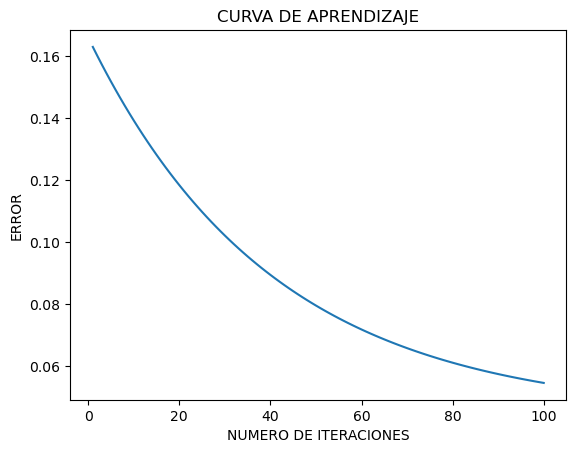

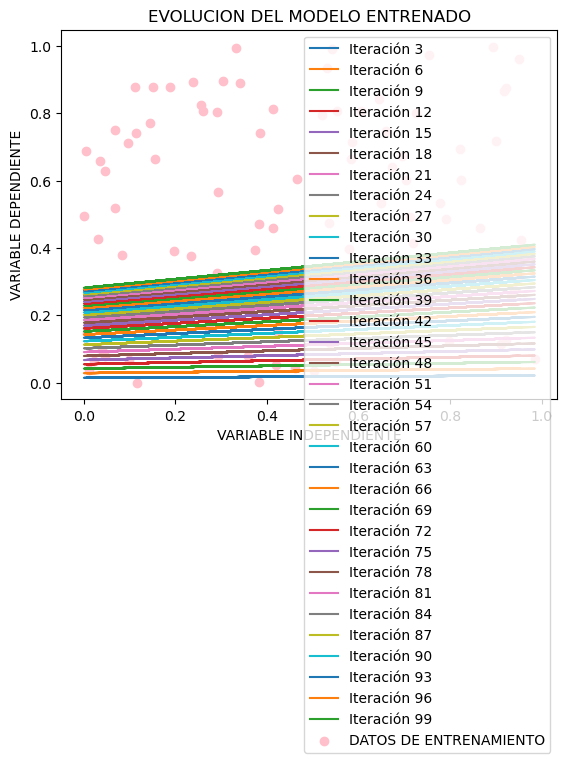

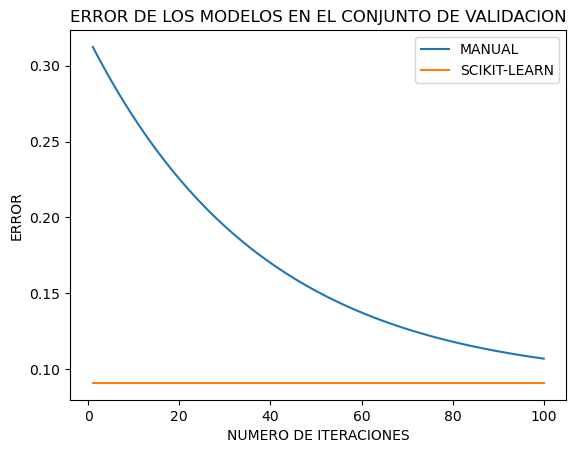

In [27]:
#7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

class RegresionLinealCustom:
    def __init__(self, alpha=0.01, epochs=100, imprimir_error_cada=10):
        self.alpha = alpha
        self.epochs = epochs
        self.imprimir_error_cada = imprimir_error_cada
        self.errores = []
        self.modelos = {}

    def entrenar_modelo(self, x, y):
        # Crear matriz de diseño con la primera columna como x y la segunda columna con unos
        matriz_diseno = np.column_stack((x, np.ones_like(x)))

        # Inicializar parámetros beta
        beta = np.zeros(matriz_diseno.shape[1])

        for epoch in range(self.epochs):
            # Calcular y_hat (predicciones)
            y_hat = np.dot(matriz_diseno, beta)

            # Calcular el error
            error = mean_squared_error(y, y_hat) / 2
            self.errores.append(error)

            # Gradiente del error respecto a los parámetros
            gradiente = np.dot(matriz_diseno.T, y_hat - y) / len(y)

            # Actualizar los parámetros del modelo
            beta -= self.alpha * gradiente

            # Almacenar el modelo y el error en esta iteración
            self.modelos[epoch] = beta.copy()

            # Imprimir el error cada imprimir_error_cada iteraciones
            if (epoch + 1) % self.imprimir_error_cada == 0:
                print(f"ITERACION {epoch + 1}: ERROR = {error}")

        return beta

    def graficar_curva_aprendizaje(self):
        plt.plot(range(1, self.epochs + 1), self.errores)
        plt.xlabel('NUMERO DE ITERACIONES')
        plt.ylabel('ERROR')
        plt.title('CURVA DE APRENDIZAJE')
        plt.show()

    def graficar_modelo_entrenado(self, x, y, n=3):
        for epoch, beta in self.modelos.items():
            if (epoch + 1) % n == 0:  # Graficar cada n iteraciones
                y_pred = np.dot(np.column_stack((x, np.ones_like(x))), beta)
                plt.plot(x, y_pred, label=f'Iteración {epoch + 1}')

        plt.scatter(x, y, color='pink', label='DATOS DE ENTRENAMIENTO') #Coloreando mi gráfica de rosa...
        plt.xlabel('VARIABLE INDEPENDIENTE')
        plt.ylabel('VARIABLE DEPENDIENTE')
        plt.title('EVOLUCION DEL MODELO ENTRENADO')
        plt.legend()
        plt.show()

    def predecir_promedio(self, x):
        y_pred_manual = []
        y_pred_sklearn = []

        for epoch, beta in self.modelos.items():
            y_pred_manual.append(np.dot(np.column_stack((x, np.ones_like(x))), beta))

        modelo_sklearn = LinearRegression()
        modelo_sklearn.fit(x.reshape(-1, 1), y)
        y_pred_sklearn = modelo_sklearn.predict(x.reshape(-1, 1))

        y_pred_promedio = (np.array(y_pred_manual) + y_pred_sklearn) / 2

        return y_pred_manual, y_pred_sklearn, y_pred_promedio

    def evaluar_modelo(self, x_val, y_val):
        errores_manual = []
        errores_sklearn = []

        for epoch, beta in self.modelos.items():
            y_pred_manual = np.dot(np.column_stack((x_val, np.ones_like(x_val))), beta)
            modelo_sklearn = LinearRegression()
            modelo_sklearn.fit(x_val.reshape(-1, 1), y_val)
            y_pred_sklearn = modelo_sklearn.predict(x_val.reshape(-1, 1))

            error_manual = mean_squared_error(y_val, y_pred_manual)
            error_sklearn = mean_squared_error(y_val, y_pred_sklearn)

            errores_manual.append(error_manual)
            errores_sklearn.append(error_sklearn)

        return errores_manual, errores_sklearn

# ASIGNACIÓN DATASET ds
ds = np.random.rand(100, 2) 
x_ds = ds[:, 0]
y_ds = ds[:, 1]

# Instanciar el modelo de regresión lineal personalizado
modelo_personalizado = RegresionLinealCustom(alpha=0.01, epochs=100, imprimir_error_cada=10)

# Entrenar el modelo personalizado
parametros_entrenados = modelo_personalizado.entrenar_modelo(x_ds, y_ds)

# Graficar la curva de aprendizaje
modelo_personalizado.graficar_curva_aprendizaje()

# Graficar la evolución del modelo entrenado
modelo_personalizado.graficar_modelo_entrenado(x_ds, y_ds)

# Evaluar el modelo con un conjunto de validación (20% de los datos)
x_val = np.random.rand(20)  # Ejemplo de conjunto de validación x
y_val = np.random.rand(20)  # Ejemplo de conjunto de validación y
errores_manual, errores_sklearn = modelo_personalizado.evaluar_modelo(x_val, y_val)

# Graficar el error de cada modelo para la variable x
plt.plot(range(1, modelo_personalizado.epochs + 1), errores_manual, label='MANUAL')
plt.plot(range(1, modelo_personalizado.epochs + 1), errores_sklearn, label='SCIKIT-LEARN')
plt.xlabel('NUMERO DE ITERACIONES')
plt.ylabel('ERROR')
plt.title('ERROR DE LOS MODELOS EN EL CONJUNTO DE VALIDACION')
plt.legend()
plt.show()


